In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import ttest_ind
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

1.	How would you estimate the impact the weather has on Uber pickups?

            a.	Do certain weather conditions lead to an increase or decrease in pickups?

            b.	Are there any correlations between weather variables and pickups?


pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [2]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("Resources/clean.csv")
df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [3]:
df['pickup_dt'] = pd.to_datetime(df['pickup_dt'])

# Create a new column 'day_of_week' to store the day of the week
df['day_of_week'] = df['pickup_dt'].dt.day_name()

# Display the data 
df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday,day_of_week
0,2015-01-01,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
1,2015-01-01,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
2,2015-01-01,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
3,2015-01-01,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday
4,2015-01-01,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y,Thursday


In [4]:
clean_df = df[['pickup_dt','month', 'borough', 'pickups', 'Wind speed',
       'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth', 'Holiday', 'day_of_week']]
clean_df.describe()

,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
count,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000
mean,547.176450,6.000261,8.820094,8.603054,30.650873,1017.813116,0.003821,0.026086,0.091049,2.536200
std,1037.216546,3.705930,2.442718,10.984017,21.240373,7.782602,0.018831,0.092909,0.220412,4.520071
min,0.000000,0.000000,0.000000,-16.666667,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,-0.277778,14.000000,1012.400000,0.000000,0.000000,0.000000,0.000000
50%,86.000000,6.000000,10.000000,7.222222,30.000000,1018.250000,0.000000,0.000000,0.000000,0.000000
75%,506.000000,8.000000,10.000000,17.777778,49.000000,1022.925000,0.000000,0.000000,0.051667,3.104167
max,7883.000000,21.000000,10.000000,31.666667,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


The correlation (r-value) between pickups and Wind speed on holidays is 0.02 and r_squared is 0.0
The correlation (r-value) between pickups and Wind speed on regular days is 0.01 and r_squared is 0.0
The correlation (r-value) between pickups and Visibility on holidays is -0.01 and r_squared is 0.0
The correlation (r-value) between pickups and Visibility on regular days is -0.01 and r_squared is 0.0
The correlation (r-value) between pickups and Temperature on holidays is 0.07 and r_squared is 0.01
The correlation (r-value) between pickups and Temperature on regular days is 0.06 and r_squared is 0.0
The correlation (r-value) between pickups and dew point on holidays is 0.05 and r_squared is 0.0
The correlation (r-value) between pickups and dew point on regular days is 0.04 and r_squared is 0.0
The correlation (r-value) between pickups and Sea level pressure on holidays is -0.02 and r_squared is 0.0
The correlation (r-value) between pickups and Sea level pressure on regular days is -0.01 

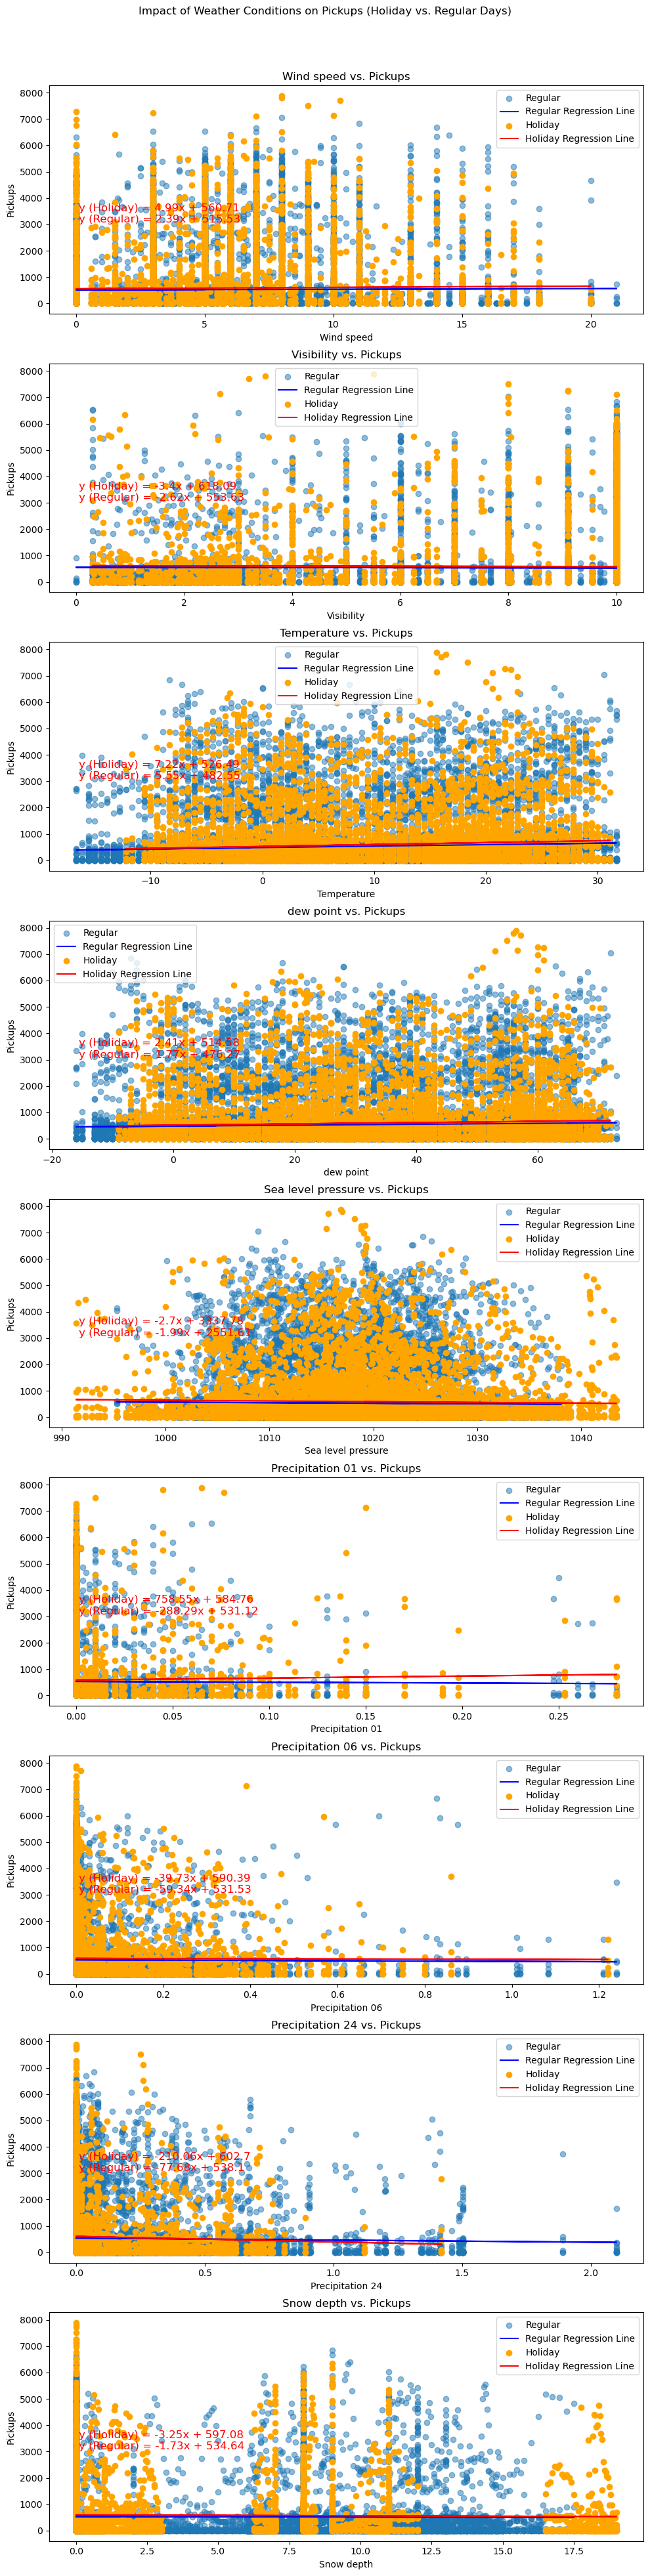

In [5]:
# Separate data into Holiday and regular days
data_holiday = df[df['Holiday'] == 'Y']
data_regular = df[df['Holiday'] == 'N']

# List of variables for analysis
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                 'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

# Create subplots for each weather condition
fig, axes = plt.subplots(len(variable_list), figsize=(10, 40))
fig.suptitle('Impact of Weather Conditions on Pickups (Holiday vs. Regular Days)')

# Initialize a counter
counter = 0

# Loop through each weather variable
for variable in variable_list:
    # Extract data for the current variable
    variable_data_holiday = data_holiday[variable]
    variable_data_regular = data_regular[variable]
    pickups_holiday = data_holiday['pickups']
    pickups_regular = data_regular['pickups']
    
    # Calculate the correlation (r-value) between 'pickups' and the current variable
    correlation_holiday = st.pearsonr(variable_data_holiday, pickups_holiday)
    correlation_regular = st.pearsonr(variable_data_regular, pickups_regular)

    # Perform linear regression analysis for holiday data
    slope_holiday, intercept_holiday, rvalue_holiday, pvalue_holiday, stderr_holiday = linregress(variable_data_holiday, pickups_holiday)
    
    # Perform linear regression analysis for regular data
    slope_regular, intercept_regular, rvalue_regular, pvalue_regular, stderr_regular = linregress(variable_data_regular, pickups_regular)

    # Calculate the values predicted by the linear regression models
    regress_values_holiday = (variable_data_holiday * slope_holiday + intercept_holiday)
    regress_values_regular = (variable_data_regular * slope_regular + intercept_regular)
    
    # Create a subplot for the current variable
    ax = axes[counter]

    # Scatter plot for regular data
    ax.scatter(variable_data_regular, pickups_regular, label='Regular', alpha=0.5)
    ax.plot(variable_data_regular, regress_values_regular, "b-", label='Regular Regression Line')

    # Scatter plot for holiday data (on top of regular data)
    ax.scatter(variable_data_holiday, pickups_holiday, label='Holiday', alpha=1, color='orange')
    ax.plot(variable_data_holiday, regress_values_holiday, "r-", label='Holiday Regression Line')

    # Print the correlation coefficients
    ax.set_xlabel(variable)
    ax.set_ylabel('Pickups')
    ax.set_title(f'{variable} vs. Pickups')
    ax.legend(loc="best")
    
    # Add annotations for r-value, r-squared value, and regression equations for both regular and holiday data
    line_eq_holiday = f'y (Holiday) = {round(slope_holiday, 2)}x + {round(intercept_holiday, 2)}'
    line_eq_regular = f'y (Regular) = {round(slope_regular, 2)}x + {round(intercept_regular, 2)}'
    
    annotation_text = f'{line_eq_holiday}\n{line_eq_regular}'
    
    ax.annotate(annotation_text, (0.05, 0.4), xycoords='axes fraction', fontsize=12, color='red')

    # Increment the counter
    counter += 1

    # Calculate the R-squared values for holiday and regular data
    r_squared_holiday = rvalue_holiday ** 2
    r_squared_regular = rvalue_regular ** 2

    print(f"The correlation (r-value) between pickups and {variable} on holidays is {round(correlation_holiday[0], 2)} and r_squared is {round(r_squared_holiday,2)}")
    print(f"The correlation (r-value) between pickups and {variable} on regular days is {round(correlation_regular[0], 2)} and r_squared is {round(r_squared_regular,2)}")

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


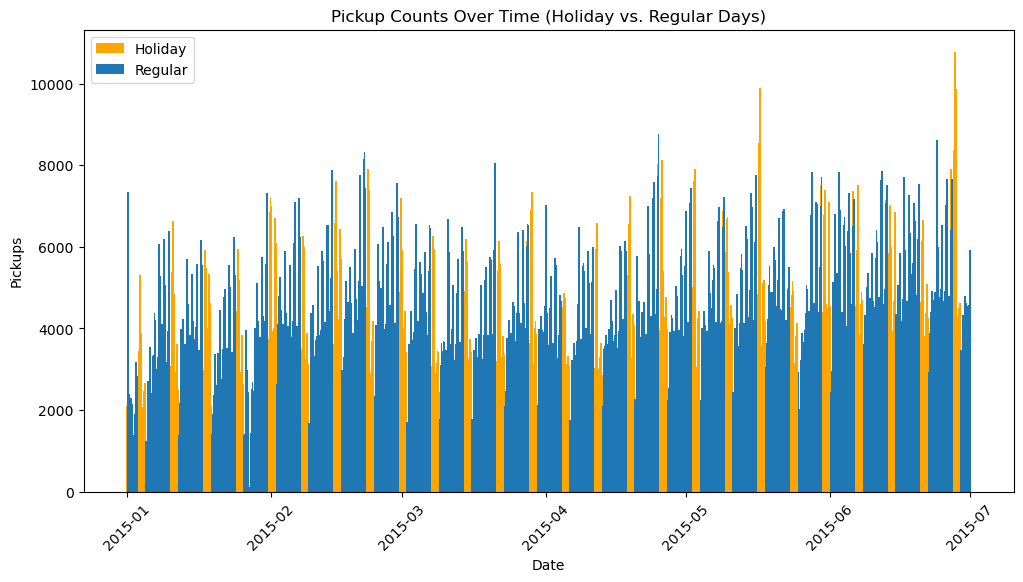

In [6]:
# Separate data into Holiday and regular days
data_holiday = df[df['Holiday'] == 'Y']
data_regular = df[df['Holiday'] == 'N']

# Group the data by date and calculate the sum of pickups for each day
holiday_daily_pickups = data_holiday.groupby('pickup_dt')['pickups'].sum()
regular_daily_pickups = data_regular.groupby('pickup_dt')['pickups'].sum()

# Convert the index (date) to datetime format
holiday_daily_pickups.index = pd.to_datetime(holiday_daily_pickups.index)
regular_daily_pickups.index = pd.to_datetime(regular_daily_pickups.index)

# Create a bar plot with different colors for holiday and regular
plt.figure(figsize=(12, 6))
plt.bar(holiday_daily_pickups.index, holiday_daily_pickups, width=0.4, label='Holiday', color='orange',alpha = 1, align='center')
plt.bar(regular_daily_pickups.index, regular_daily_pickups, width=0.4, label='Regular', align='edge')
plt.title('Pickup Counts Over Time (Holiday vs. Regular Days)')
plt.xlabel('Date')
plt.ylabel('Pickups')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [7]:
# Hypothesis testing 
# Example: t-test to compare pickups on holidays vs. non-holidays
holiday_pickups = df[df['Holiday'] == 'Y']['pickups']
non_holiday_pickups = df[df['Holiday'] == 'N']['pickups']

t_stat, p_value = ttest_ind(holiday_pickups, non_holiday_pickups)
print(f't-statistic: {t_stat}, p-value: {p_value}')

t-statistic: 4.143559096293858, p-value: 3.4303549208418395e-05


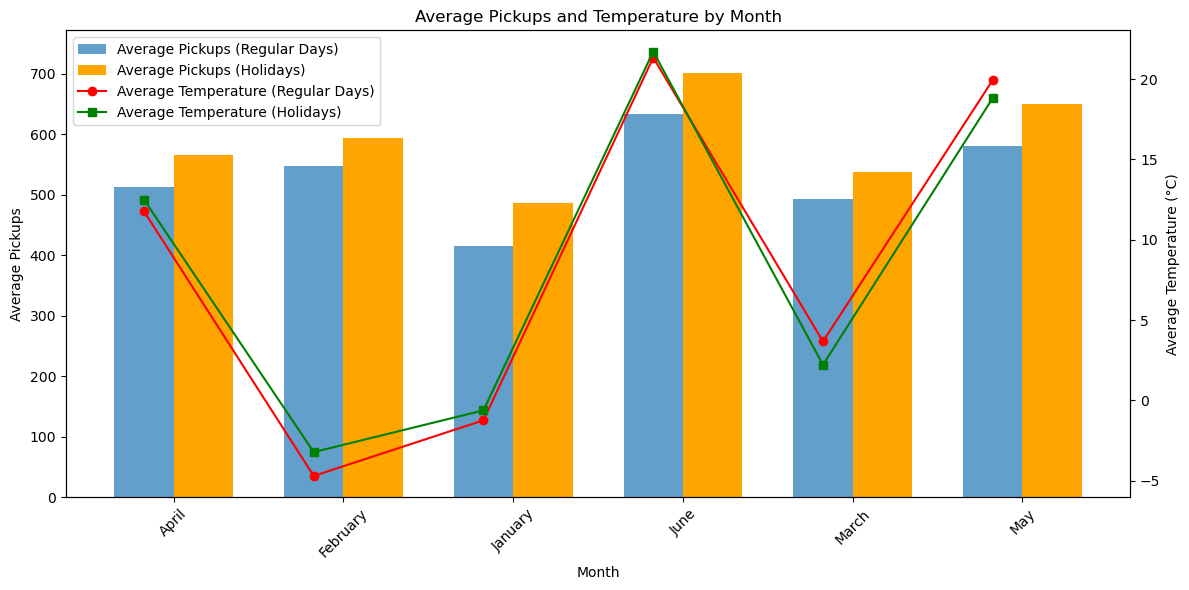

In [8]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and temperatures for each month for regular and holiday data
average_pickups_holiday = []
average_temperatures_holiday = []
average_pickups_regular = []
average_temperatures_regular = []

# Calculate the average pickups and temperatures for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_temperature = month_data['Temperature'].mean()
        average_pickups_regular.append(average_pickup)
        average_temperatures_regular.append(average_temperature)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_temperatures_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and temperatures for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_temperature = month_data['Temperature'].mean()
        average_pickups_holiday.append(average_pickup)
        average_temperatures_holiday.append(average_temperature)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_temperatures_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average temperature
ax2 = ax1.twinx()
ax2.plot(index, average_temperatures_regular, color='red', marker='o', label='Average Temperature (Regular Days)')
ax2.plot(index, average_temperatures_holiday, color='green', marker='s', label='Average Temperature (Holidays)')

# Set y-axis label for average temperature
ax2.set_ylabel('Average Temperature (°C)')


# Add a legend for the temperature
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and Temperature by Month')

# Adjust layout
plt.tight_layout()
plt.show()


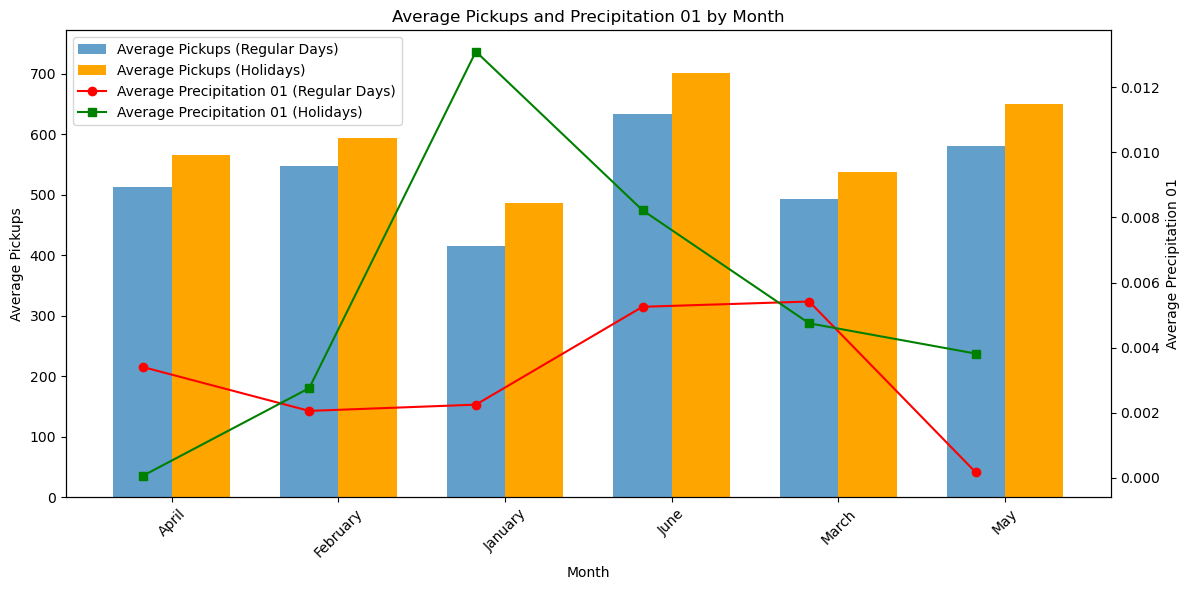

In [9]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
data_regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and waether_condition for each month for regular and holiday data
average_pickups_holiday = []
average_waether_condition_holiday = []
average_pickups_regular = []
average_waether_condition_regular = []

# Calculate the average pickups and waether_condition for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Precipitation 01'].mean()
        average_pickups_regular.append(average_pickup)
        average_waether_condition_regular.append(average_waether_condition)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and waether_condition for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Precipitation 01'].mean()
        average_pickups_holiday.append(average_pickup)
        average_waether_condition_holiday.append(average_waether_condition)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average waether_condition
ax2 = ax1.twinx()
ax2.plot(index, average_waether_condition_regular, color='red', marker='o', label='Average Precipitation 01 (Regular Days)')
ax2.plot(index, average_waether_condition_holiday, color='green', marker='s', label='Average Precipitation 01 (Holidays)')

# Set y-axis label for average waether_condition
ax2.set_ylabel('Average Precipitation 01')


# Add a legend for the waether_condition
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and Precipitation 01 by Month')

# Adjust layout
plt.tight_layout()
plt.show()


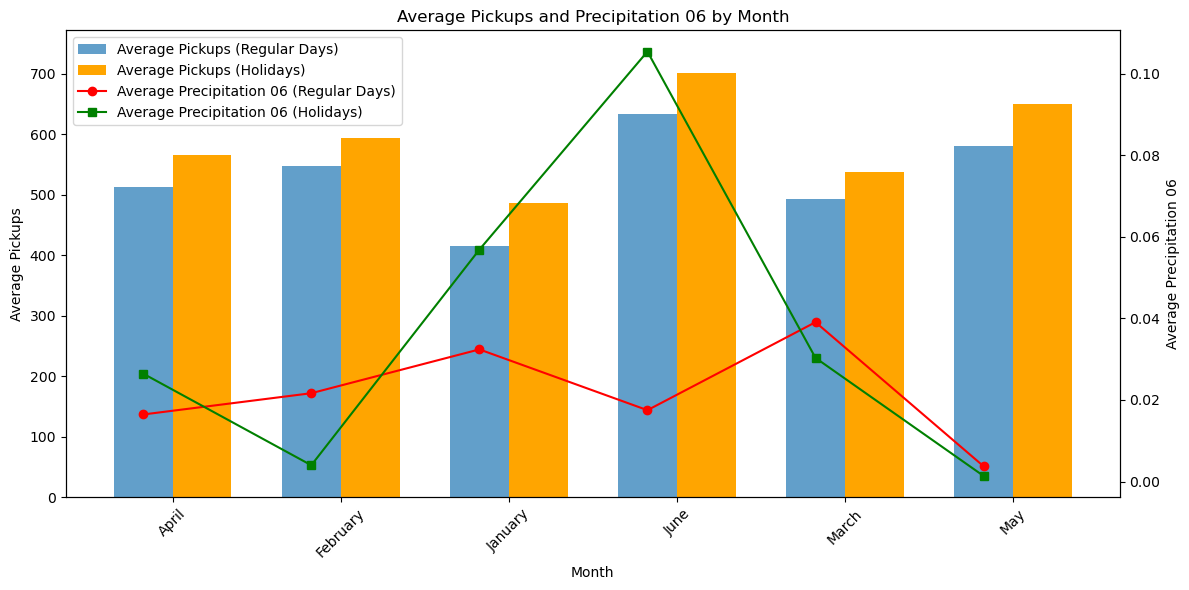

In [10]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
data_regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and waether_condition for each month for regular and holiday data
average_pickups_holiday = []
average_waether_condition_holiday = []
average_pickups_regular = []
average_waether_condition_regular = []

# Calculate the average pickups and waether_condition for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Precipitation 06'].mean()
        average_pickups_regular.append(average_pickup)
        average_waether_condition_regular.append(average_waether_condition)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and waether_condition for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Precipitation 06'].mean()
        average_pickups_holiday.append(average_pickup)
        average_waether_condition_holiday.append(average_waether_condition)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average waether_condition
ax2 = ax1.twinx()
ax2.plot(index, average_waether_condition_regular, color='red', marker='o', label='Average Precipitation 06 (Regular Days)')
ax2.plot(index, average_waether_condition_holiday, color='green', marker='s', label='Average Precipitation 06 (Holidays)')

# Set y-axis label for average waether_condition
ax2.set_ylabel('Average Precipitation 06')


# Add a legend for the waether_condition
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and Precipitation 06 by Month')

# Adjust layout
plt.tight_layout()
plt.show()


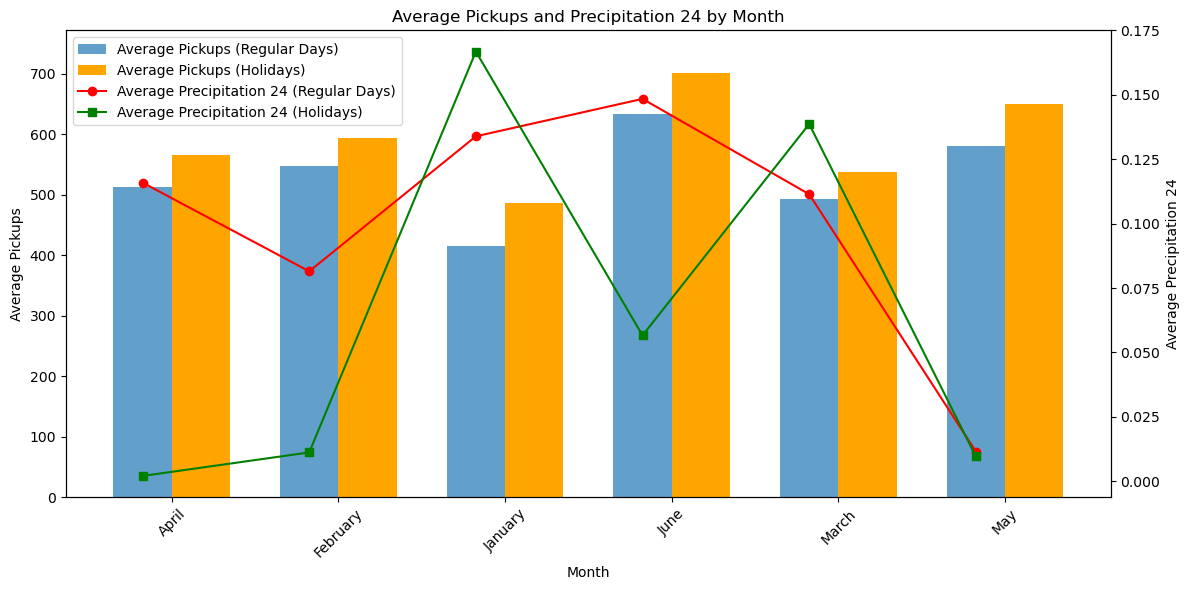

In [11]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
data_regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and waether_condition for each month for regular and holiday data
average_pickups_holiday = []
average_waether_condition_holiday = []
average_pickups_regular = []
average_waether_condition_regular = []

# Calculate the average pickups and waether_condition for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Precipitation 24'].mean()
        average_pickups_regular.append(average_pickup)
        average_waether_condition_regular.append(average_waether_condition)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and waether_condition for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Precipitation 24'].mean()
        average_pickups_holiday.append(average_pickup)
        average_waether_condition_holiday.append(average_waether_condition)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average waether_condition
ax2 = ax1.twinx()
ax2.plot(index, average_waether_condition_regular, color='red', marker='o', label='Average Precipitation 24 (Regular Days)')
ax2.plot(index, average_waether_condition_holiday, color='green', marker='s', label='Average Precipitation 24 (Holidays)')

# Set y-axis label for average waether_condition
ax2.set_ylabel('Average Precipitation 24')


# Add a legend for the waether_condition
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and Precipitation 24 by Month')

# Adjust layout
plt.tight_layout()
plt.show()


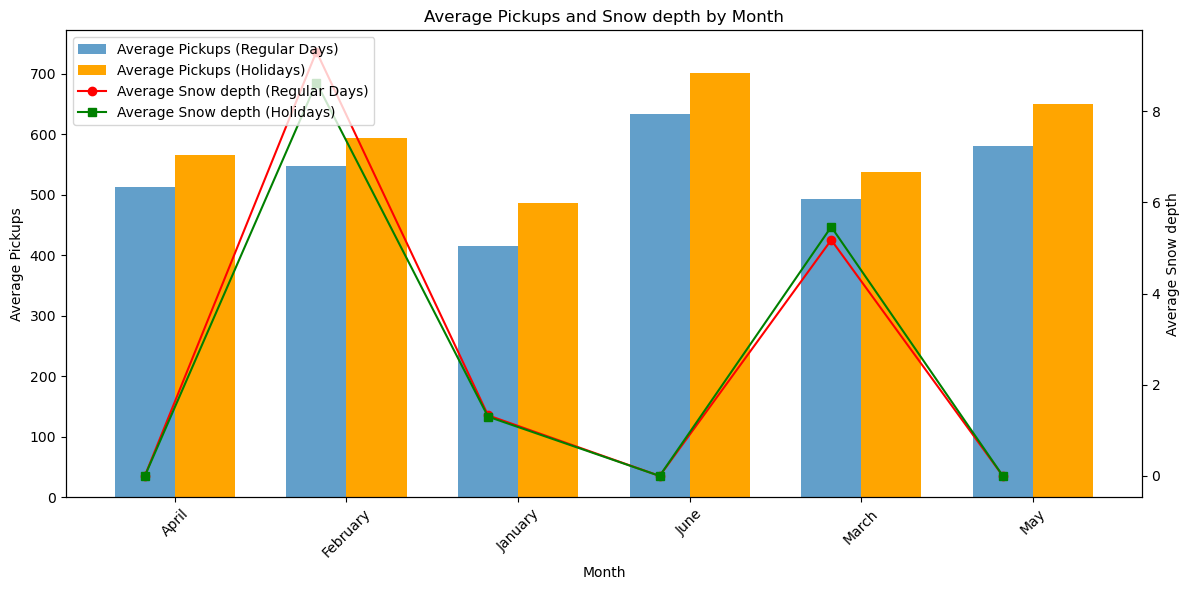

In [12]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
data_regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and waether_condition for each month for regular and holiday data
average_pickups_holiday = []
average_waether_condition_holiday = []
average_pickups_regular = []
average_waether_condition_regular = []

# Calculate the average pickups and waether_condition for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Snow depth'].mean()
        average_pickups_regular.append(average_pickup)
        average_waether_condition_regular.append(average_waether_condition)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and waether_condition for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Snow depth'].mean()
        average_pickups_holiday.append(average_pickup)
        average_waether_condition_holiday.append(average_waether_condition)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average waether_condition
ax2 = ax1.twinx()
ax2.plot(index, average_waether_condition_regular, color='red', marker='o', label='Average Snow depth (Regular Days)')
ax2.plot(index, average_waether_condition_holiday, color='green', marker='s', label='Average Snow depth (Holidays)')

# Set y-axis label for average waether_condition
ax2.set_ylabel('Average Snow depth')


# Add a legend for the waether_condition
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and Snow depth by Month')

# Adjust layout
plt.tight_layout()
plt.show()


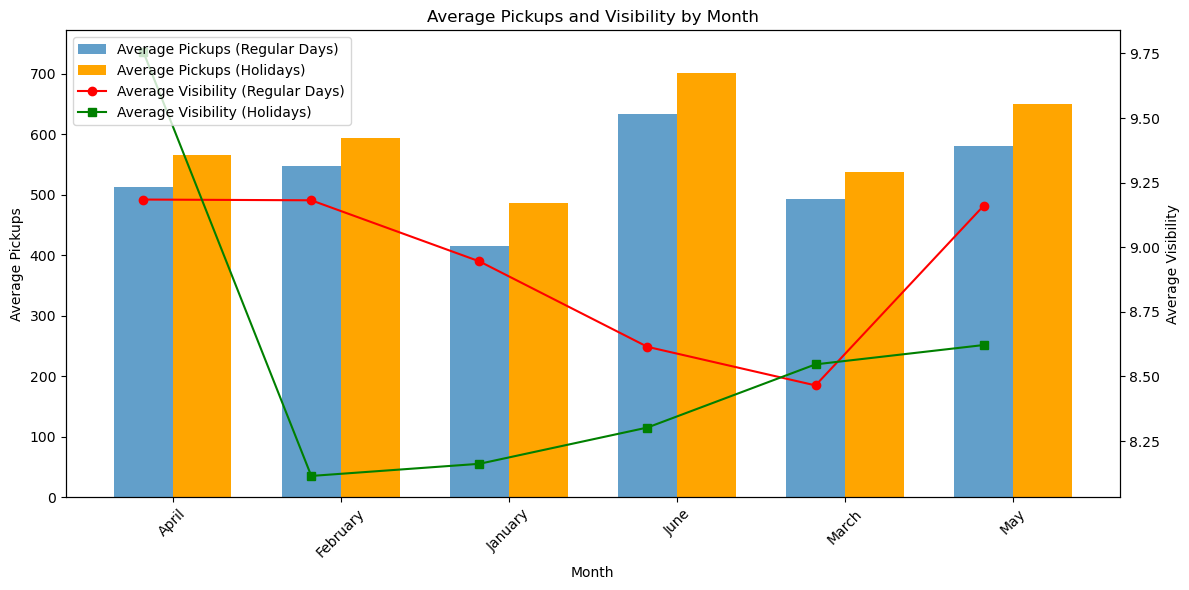

In [13]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
data_regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and waether_condition for each month for regular and holiday data
average_pickups_holiday = []
average_waether_condition_holiday = []
average_pickups_regular = []
average_waether_condition_regular = []

# Calculate the average pickups and waether_condition for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Visibility'].mean()
        average_pickups_regular.append(average_pickup)
        average_waether_condition_regular.append(average_waether_condition)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and waether_condition for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Visibility'].mean()
        average_pickups_holiday.append(average_pickup)
        average_waether_condition_holiday.append(average_waether_condition)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average waether_condition
ax2 = ax1.twinx()
ax2.plot(index, average_waether_condition_regular, color='red', marker='o', label='Average Visibility (Regular Days)')
ax2.plot(index, average_waether_condition_holiday, color='green', marker='s', label='Average Visibility (Holidays)')

# Set y-axis label for average waether_condition
ax2.set_ylabel('Average Visibility')


# Add a legend for the waether_condition
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and Visibility by Month')

# Adjust layout
plt.tight_layout()
plt.show()


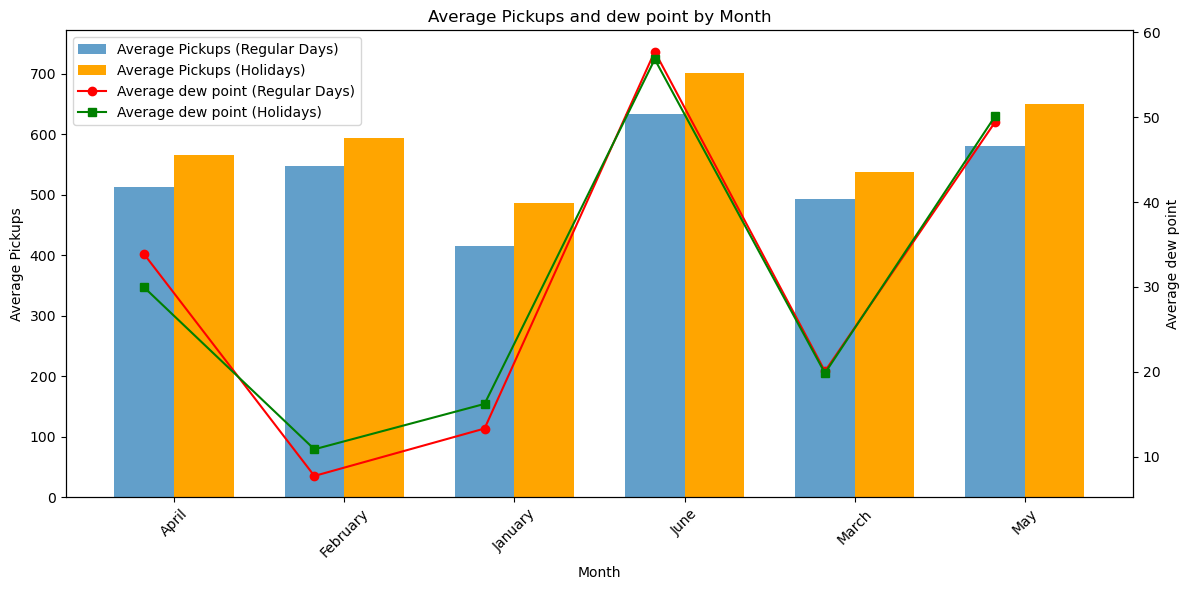

In [14]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
data_regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and waether_condition for each month for regular and holiday data
average_pickups_holiday = []
average_waether_condition_holiday = []
average_pickups_regular = []
average_waether_condition_regular = []

# Calculate the average pickups and waether_condition for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['dew point'].mean()
        average_pickups_regular.append(average_pickup)
        average_waether_condition_regular.append(average_waether_condition)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and waether_condition for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['dew point'].mean()
        average_pickups_holiday.append(average_pickup)
        average_waether_condition_holiday.append(average_waether_condition)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average waether_condition
ax2 = ax1.twinx()
ax2.plot(index, average_waether_condition_regular, color='red', marker='o', label='Average dew point (Regular Days)')
ax2.plot(index, average_waether_condition_holiday, color='green', marker='s', label='Average dew point (Holidays)')

# Set y-axis label for average waether_condition
ax2.set_ylabel('Average dew point')


# Add a legend for the waether_condition
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and dew point by Month')

# Adjust layout
plt.tight_layout()
plt.show()


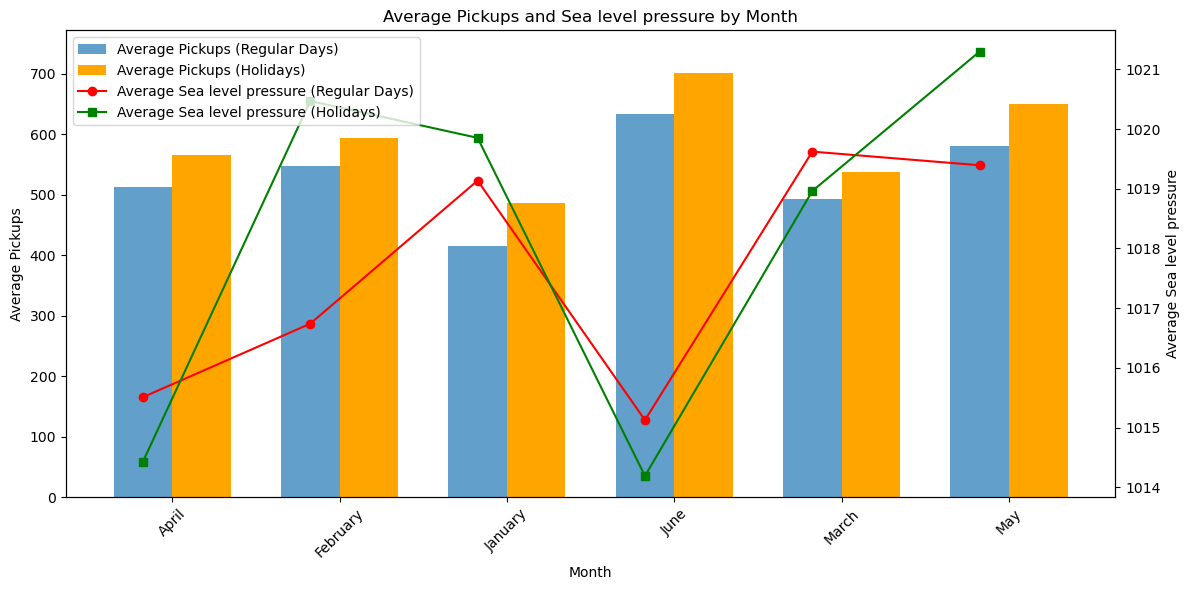

In [15]:
# Filter the data on holidays
data_holiday = df[(df['Holiday'] == 'Y')]

# Filter the data on regular days (non-holidays)
data_regular = df[(df['Holiday'] == 'N')]

# Create a list of unique months for both regular and holiday data
months_holiday = data_holiday['month'].unique()
months_regular = data_regular['month'].unique()

# Combine the unique months from both datasets
all_months = np.union1d(months_holiday, months_regular)

# Initialize lists to store the average pickups and waether_condition for each month for regular and holiday data
average_pickups_holiday = []
average_waether_condition_holiday = []
average_pickups_regular = []
average_waether_condition_regular = []

# Calculate the average pickups and waether_condition for each month for regular data
for month in all_months:
    if month in months_regular:
        month_data = data_regular[data_regular['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Sea level pressure'].mean()
        average_pickups_regular.append(average_pickup)
        average_waether_condition_regular.append(average_waether_condition)
    else:
        average_pickups_regular.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_regular.append(0)  # Use 0 if there's no data for this month

# Calculate the average pickups and waether_condition for each month for holiday data
for month in all_months:
    if month in months_holiday:
        month_data = data_holiday[data_holiday['month'] == month]
        average_pickup = month_data['pickups'].mean()
        average_waether_condition = month_data['Sea level pressure'].mean()
        average_pickups_holiday.append(average_pickup)
        average_waether_condition_holiday.append(average_waether_condition)
    else:
        average_pickups_holiday.append(0)  # Use 0 if there's no data for this month
        average_waether_condition_holiday.append(0)  # Use 0 if there's no data for this month

# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate the width of each bar
bar_width = 0.35
index = np.arange(len(all_months))

# Plot regular days data
ax1.bar(index, average_pickups_regular, width=bar_width, label='Average Pickups (Regular Days)', alpha=0.7)
ax1.bar(index + bar_width, average_pickups_holiday, width=bar_width, label='Average Pickups (Holidays)', alpha=1, color='orange')

# Set x-axis labels to be the month names
ax1.set_xlabel('Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_months, rotation=45)

# Set y-axis label for average pickups
ax1.set_ylabel('Average Pickups')
ax1.set_ylim(0, max(max(average_pickups_regular), max(average_pickups_holiday)) * 1.1)  # Set y-axis limit


# Create a second y-axis for average waether_condition
ax2 = ax1.twinx()
ax2.plot(index, average_waether_condition_regular, color='red', marker='o', label='Average Sea level pressure (Regular Days)')
ax2.plot(index, average_waether_condition_holiday, color='green', marker='s', label='Average Sea level pressure (Holidays)')

# Set y-axis label for average waether_condition
ax2.set_ylabel('Average Sea level pressure')


# Add a legend for the waether_condition
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Set the title
ax1.set_title('Average Pickups and Sea level pressure by Month')

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
# Calculate correlations
correlations = df[['pickups', 'Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']].corr()
correlations

,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
pickups,1.000000,0.009729,-0.008434,0.063720,0.040110,-0.015715,0.005005,-0.002847,-0.022945,-0.009663
Wind speed,0.009729,1.000000,0.086184,-0.296150,-0.321628,-0.092750,-0.000354,0.016703,-0.010397,0.097022
Visibility,-0.008434,0.086184,1.000000,0.025191,-0.231300,0.167043,-0.488405,-0.118324,0.000902,-0.047841
Temperature,0.063720,-0.296150,0.025191,1.000000,0.896558,-0.224552,-0.013350,-0.037396,-0.014453,-0.545465
dew point,0.040110,-0.321628,-0.231300,0.896558,1.000000,-0.311165,0.115384,0.013191,0.001475,-0.489290
Sea level pressure,-0.015715,-0.092750,0.167043,-0.224552,-0.311165,1.000000,-0.089750,-0.104911,-0.134677,0.121495
Precipitation 01,0.005005,-0.000354,-0.488405,-0.013350,0.115384,-0.089750,1.000000,0.128065,0.001000,0.000307
Precipitation 06,-0.002847,0.016703,-0.118324,-0.037396,0.013191,-0.104911,0.128065,1.000000,0.251190,0.039902
Precipitation 24,-0.022945,-0.010397,0.000902,-0.014453,0.001475,-0.134677,0.001000,0.251190,1.000000,0.069646
Snow depth,-0.009663,0.097022,-0.047841,-0.545465,-0.489290,0.121495,0.000307,0.039902,0.069646,1.000000


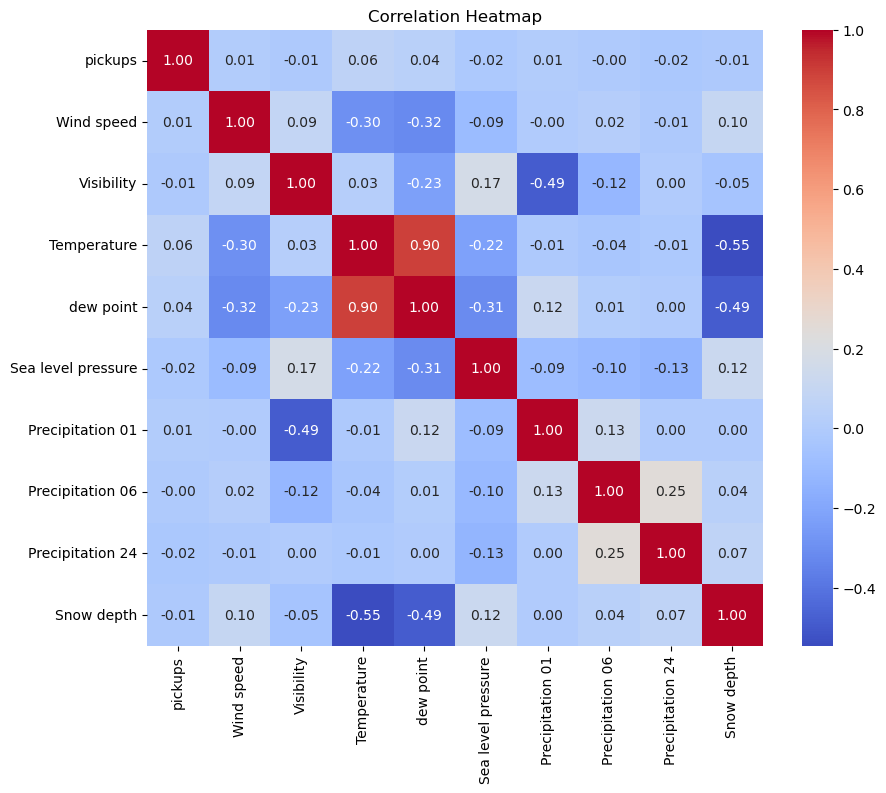

In [17]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [18]:

# Define a list of unique boroughs and months
unique_boroughs = df['borough'].unique()
unique_months = df['month'].unique()

# Define the list of weather variables
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                 'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

# Create an empty DataFrame to store correlations
correlation_df = pd.DataFrame(columns=['Borough', 'Month'] + variable_list)

# Iterate through each combination of borough, month, and weather variable
for borough in unique_boroughs:
    for month in unique_months:
        row_data = {'Borough': borough, 'Month': month}
        for weather_variable in variable_list:
            # Filter the data for the current borough, month, and weather variable
            subset = df[(df['borough'] == borough) & (df['month'] == month)]
            
            # Calculate the correlation between pickups and the current weather variable
            correlation_matrix = subset[['pickups', weather_variable]].corr()
            
            # Get the correlation coefficient for pickups and the current weather variable
            pickup_weather_corr = correlation_matrix.loc['pickups', weather_variable]
            
            # Store the correlation coefficient in the row_data dictionary
            row_data[weather_variable] = pickup_weather_corr
        
        # Append the row_data to the DataFrame
        correlation_df = correlation_df.append(row_data, ignore_index=True)

# Print the correlation DataFrame
correlation_df


,Borough,Month,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
0,Bronx,January,-0.040358,0.024773,-0.016117,-0.067318,0.029724,0.032005,-0.049737,-0.086462,0.083042
1,Bronx,February,-0.023487,-0.005658,-0.004703,-0.139614,0.115286,-0.013565,-0.069389,-0.063864,0.092612
2,Bronx,March,0.061088,-0.022606,0.024183,0.019515,-0.041831,-0.016794,-0.000339,-0.046595,-0.084329
3,Bronx,April,0.107456,0.115335,0.218452,-0.110572,-0.167964,-0.025524,0.245567,-0.068273,NaN
4,Bronx,May,0.028829,-0.039783,0.166150,0.092105,0.048179,0.061845,0.017993,-0.016296,NaN
5,Bronx,June,0.062832,-0.027497,0.139803,-0.053803,-0.025428,-0.001576,0.006253,-0.025443,NaN
6,Brooklyn,January,0.032963,0.056464,0.020604,-0.080325,0.003622,0.059333,-0.017652,-0.070510,0.098771
7,Brooklyn,February,-0.065307,-0.063265,0.122259,-0.046503,0.120421,0.027888,-0.091196,-0.126581,-0.074314
8,Brooklyn,March,0.076447,-0.048983,0.056850,0.070318,-0.086828,0.015834,-0.012526,-0.051755,-0.126999
9,Brooklyn,April,0.090712,0.101792,0.229029,-0.107819,-0.150197,-0.041458,0.239273,-0.170964,NaN


In [19]:
# Define a list of unique boroughs and months
unique_boroughs = df['borough'].unique()
unique_months = df['month'].unique()

# Define the list of weather variables
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                 'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

# Create dictionaries to store the first most positive and most negative correlations
first_most_positive_corr = {}
first_most_negative_corr = {}

# Iterate through each combination of borough, month, and weather variable
for borough in unique_boroughs:
    for month in unique_months:

        for weather_variable in variable_list:
            # Filter the data for the current borough, month, and weather variable
            subset = df[(df['borough'] == borough) & (df['month'] == month)]
            
            # Calculate the correlation between pickups and the current weather variable
            correlation_matrix = subset[['pickups', weather_variable]].corr()
            
            # Get the correlation coefficient for pickups and the current weather variable
            pickup_weather_corr = correlation_matrix.loc['pickups', weather_variable]

            # Check if the weather variable is already in the dictionaries
            if weather_variable not in first_most_positive_corr:
                first_most_positive_corr[weather_variable] = (borough, month, pickup_weather_corr)
                first_most_negative_corr[weather_variable] = (borough, month, pickup_weather_corr)
            else:
                # Update the dictionaries if a more positive or negative correlation is found
                if pickup_weather_corr > first_most_positive_corr[weather_variable][2]:
                    first_most_positive_corr[weather_variable] = (borough, month, pickup_weather_corr)
                if pickup_weather_corr < first_most_negative_corr[weather_variable][2]:
                    first_most_negative_corr[weather_variable] = (borough, month, pickup_weather_corr)

# Print the first most positive and most negative correlations for each weather variable
print("First Most Positive Correlations between Pickups and Weather Variable:")
for weather_variable, data in first_most_positive_corr.items():
    print(f"Weather Variable: {weather_variable}, Borough: {data[0]}, Month: {data[1]}, Correlation: {data[2]}")

print("\nFirst Most Negative Correlations Pickups and Weather Variable:")
for weather_variable, data in first_most_negative_corr.items():
    print(f"Weather Variable: {weather_variable}, Borough: {data[0]}, Month: {data[1]}, Correlation: {data[2]}")


First Most Positive Correlations between Pickups and Weather Variable:
Weather Variable: Wind speed, Borough: Manhattan, Month: April, Correlation: 0.20559049100671592
Weather Variable: Visibility, Borough: Staten Island, Month: April, Correlation: 0.11644299080853969
Weather Variable: Temperature, Borough: Queens, Month: May, Correlation: 0.3471871963367363
Weather Variable: dew point, Borough: Bronx, Month: May, Correlation: 0.09210460378941997
Weather Variable: Sea level pressure, Borough: Brooklyn, Month: February, Correlation: 0.12042076980651469
Weather Variable: Precipitation 01, Borough: Queens, Month: May, Correlation: 0.0900255899464121
Weather Variable: Precipitation 06, Borough: Bronx, Month: April, Correlation: 0.2455674375255099
Weather Variable: Precipitation 24, Borough: EWR, Month: May, Correlation: 0.09744067505270175
Weather Variable: Snow depth, Borough: Brooklyn, Month: January, Correlation: 0.09877058681009816

First Most Negative Correlations Pickups and Weather 